# Hypothesis testing and Power # 


## Hypothesis testing

What is a hypothesis?

* A starting point for investigation
* A statement that can be disproven with data
* A proposition made as a basis for reasoning, without any assumption of its truth

Four basic elements of a statistical test:

1. Null Hypothesis $H_0$
2. Alternate hypothesis $H_a$
3. Test statistic
4. Region of rejection for the null hypothesis

### 1. Null Hypothesis $H_o$

_Example:_

In a calibration bath measuring temperature,

* $x$ - A set of sensor measurements, error prone (noise and bias)

* $\mu_0$ - Calibration bath temperature, known to many more significant digits than the sensitivity of the sensor being calibrated (for temperature calibration, the well-defined triple point of gallium is used as a reference point)

* $\mu$ - The average temperature of the measurement-prone sensor in the calibration bath. This is unknown, it is what we are trying to estimate with the sample mean $\bar{x}$.

For this example, the null hypothesis is

$H_0$: $\mu = \mu_0$.

(the sensor is unbiased)

### 2. Alternate hypothesis $H_a$

The alternate hypothesis must cover all possibilities not covered by the null hypothesis. The probability of either the null hypothesis of alternate hypothesis must sum to 1, and they must be mutually exclusive. 

For the calibration bath example described above,

$H_a$: $\mu \neq \mu_0$.

### 3. Test statistic

The test statistic can either be __parametric__ or __non-parametric__. Parametric tests are based on theoretical probability distributions, such as the normal distribution. Non-parametric tests do not assume a particular distribution, but are often less efficient or sacrifice statistical power (see below).

For the calibration bath example, the appropriate statistical test is the one sample t-test. This is because we are comparing one group of samples (sensor measurements) to a known value (calibration bath temperature). We also expect the sensor measurements to be normally distributed.

For a normally distributed parent population the _t-statistic_,

$t = \frac{ \bar{x} - \mu } {s\sqrt{\frac{1}{N}}}$,

has a known distribution. If $N$ samples are taken from the population many many times, the resulting t-statistics will follow a probability distribution called the t-distribution (see [Probability and distributions](week02-probability_and_distributions.ipynb)). 

### 4.  Region of rejection of the null hypothesis

In order decide whether to accept or reject the null hypothesis, we must define what constitutes an "extreme" value of the test statistic. 

For a group of $N$ = 4 samples (3 degrees of freedom) taken randomly from a normal distribution, there is 5% chance that the t-statistic will be either greater than 3.18 or less than -3.18. This defines the rejection region for a 95% confidence level. In this case, $\alpha =$ 0.05 is the probability that the null hypothesis will be wrongly rejected based on $N$ samples, _if the null hypothesis is true_. Conversely, there is a 95% probability that the null hypothesis will be correctly accepted, _if  the null hypothesis is true_, which in general is not known.

Example (two-tailed test):

reject null-hypothesis if: $|t|$ > $t_{1-\frac{\alpha}{2},N-1}$

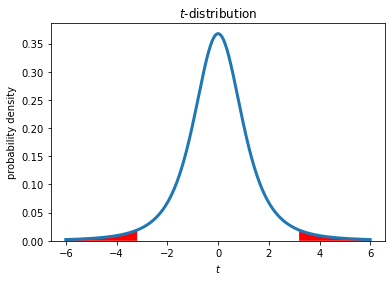

In [1]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

# number of samples
N = 4
alpha = 0.05

# plot t-distribution
tvalues = np.arange(-6,6,0.01)
tpdf = stats.t.pdf(tvalues,N-1)

plt.figure()
plt.plot(tvalues,tpdf,lw=3)
plt.xlabel('$t$')
plt.ylabel('probability density')
plt.title('$t$-distribution')
plt.gca().set_ylim(bottom=0)

# plot rejection regions
tcrit = stats.t.ppf(1-alpha/2,N-1)
upperi, = np.where(tvalues>tcrit)
loweri, = np.where(tvalues<-tcrit)
plt.fill_between(tvalues[upperi],tpdf[upperi],facecolor='red')
plt.fill_between(tvalues[loweri],tpdf[loweri],facecolor='red');

In Python, the upper and lower critical values of a test statistic can be found by selecting a distribution from the `stats` library (`stats.t` in this case) and using the `ppf` function.

In [2]:
alpha = 0.05
N = 4
tupper = stats.t.ppf(1-alpha/2,N-1)
tlower = stats.t.ppf(alpha/2,N-1)
print('upper critical t value = '+str(tupper))
print('lower critical t value = '+str(tlower))

upper critical t value = 3.182446305284263
lower critical t value = -3.1824463052842638


The probability of obtaining a certain $t$ value or less can be found from the cumulative distribution function, `cdf`.

In [3]:
stats.t.cdf(tupper,N-1)

0.9750000000000106

In testing a null hypothesis, there are four possible situations, depending on the actual truth of the null hypothesis, and the conclusion that is drawn from a test statistic calculated from a finite number of samples.

![images/hypothesis-table.png](images/hypothesis-table.png)

Here, $(1-\alpha)$ is called the "confidence level" and $(1-\beta)$ is called the "statistical power". $\alpha$ is the probability of making a __Type I error__ and $\beta$ is the probability of making a __Type II error__.

Some version of this table is presented in nearly every textbook on statistics. However, it still leads to a lot of confusion. 

Let's say you are comparing a set of observations to a theory, or a set of sensor values with a known standard. In truth, there is almost certainly a difference between the sample mean and the true mean, say to 20+ significant digits. But, if the data are noisy it would still be difficult to _prove_ that this small difference did not just occur by random chance. Failing to reject the null hypothesis at a 95% confidence level does not mean that you are 95% certain that it is true. It just means that your data are less extreme than 95% of random groups of samples drawn from the hypothesized distribution.

Scientists tend to focus on confidence intervals rather than statistical power because this approach is conservative from a scientific point of view. By avoiding Type I errors, scientists reduce the likelihood of promoting an idea that is not actually true. This may come at the price of not detecting actual differences. However, as explained, power analysis can be an extremely valuable tool for planning experiments and determining how many samples you need. 

Power analysis is described later in these notes, after covering the basic statistical procedure of t-tests.

# Application of hypothesis testing: t-tests

The $t$-statistic is used to test whether sample means are different. It was was used by a statistician named William Sealy Gosset, who worked for the Guiness Brewery in Dublin in the early 20th century. He was interested in comparing the properties of ingredients of the beloved Irish stout with a small number of samples. To keep his corporate boss happy, Gosset published his statistical work under the pseudonym "Student". 

## One-sample t-test

The example described above, in which a sample mean is compared with a single value (possibly a known value or a theoretical result), is called a __one-sample t-test__. All t-tests assumes that the samples are drawn from a __normally-distributed__ population.

In Python, a one sample $t$-test can be conducted with the function `stats.ttest_1samp()`. Given a set of values `x` and a population mean, $\mu$ or `popmean`, this function returns the $t$-statistic and a $p$-value. The $p$-value is the probability of obtaining a $t$-statistic of that magnitude, or more extreme if the null hypothesis is true. If the $p$-value is less than $\alpha$ then the null hypothesis can be rejected.

Looking at an example where we have three samples, and we are comparing with a known value $\mu_0$ = 10.0

In [4]:
x = [1.,2.,4.]  # list of samples
mu0 = 10.0      # known value
t,p = stats.ttest_1samp(x, mu0)  
print("x:",x)
print("mu0:",mu0)
print("t:",round(t,3))
print("p:",round(p,3)) 

x: [1.0, 2.0, 4.0]
mu0: 10.0
t: -8.693
p: 0.013


In this case, the $p$-value is less than .05 but greater than 0.01, so can the null hypothesis can be rejected at the at 95% confidence level but not the 99% confidence level.

Looking at another example where the known value is closer to the sample mean,

In [5]:
a = [1,2.,4]
mu0 = 3
t,p = stats.ttest_1samp(a, mu0)
print("x:",x)
print("mu0:",mu0)
print("t:",round(t,3))
print("p:",round(p,3))

x: [1.0, 2.0, 4.0]
mu0: 3
t: -0.756
p: 0.529


we see that the $t$-statistic is much closer to zero, and the $p$-value is is much higher. In this case, the null hypothesis cannot be rejected at the 95% confidence level (or even a far more lenient 60% confidence level). 

The p-value is related to the cumulative probability of the t-statistic. The p-value is the probability of obtaining a certain value of t, or more extreme. The cumulative probability is the probability of obtaining a certain value of t or less when taking random samples from a normal distribution. 

In [6]:
tcdf = stats.t.cdf(-0.756,2)
print("cumulative probability:",round(tcdf,3))

cumulative probability: 0.264


There is a probability of 0.264 of randomly obtaining $t$ value of -0.756 or less. However, there is twice as much probability (p = 0.529) of obtaining a more extreme value ($t \leq$ -0.756 _or_ $t \geq$ -0.756).

## One-tailed vs. two-tailed tests

The two previous examples are both __two-tailed__ tests. The rejection region occupies both tails of the t-distribution. In a one tailed test, we only care about differences in a certain direction, for example:

$H_0$: $\mu \leq \mu_0$

$H_a$: $\mu > \mu_0$

In this case, the null hypothesis is rejected only for extreme t values that are greater than zero. The rejection region for the 95% confidence level is shown below for $N$ = 4 samples (3 degrees of freedom).

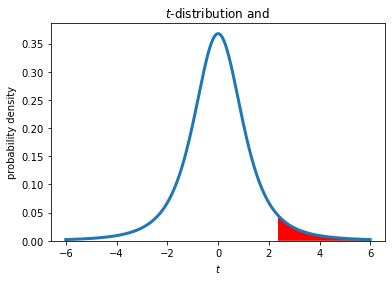

In [7]:
plt.figure()
plt.plot(tvalues,tpdf,lw=3)
plt.xlabel('$t$')
plt.ylabel('probability density')
plt.title('$t$-distribution and ')
plt.gca().set_ylim(bottom=0)

# plot rejection regions
tcrit = stats.t.ppf(1-alpha,N-1)
upperi, = np.where(tvalues>tcrit)
plt.fill_between(tvalues[upperi],tpdf[upperi],facecolor='red');

When using a function such as `stats.ttest_1samp()` to do a one-tailed test, here is how to interpret the output:

* Reject $H_o$ only if the value of t has the correct sign
* If t does have the correct sign, reject H_o if __1/2 the p-value__ is less than $\alpha$

## Two-sample t-test: comparing pairs of populations

A __two-sample t-test__ is used to test whether the means of two groups of samples are different.

$H_o: \bar{x_1} = \bar{x_2}$

$H_a: \bar{x_1} \neq \bar{x_2}$

The example below shows bacterial growth rates for two different sets of samples. The control is from a sample collected from an estuary and "GX" is from an experiment in which a polysaccharide compound (gum xantham) was added to invesitgate the effects of tranparent exopolymer particles (TEP).

![images/t_test_ex.png](images/t_test_ex.png)

_Source:_ Bar-Zeev and Rahav (2015) Microbial metabolism of transparent exopolymer particles during the summer months along a eutrophic estuary, Front. Microbiol.
http://journal.frontiersin.org/article/10.3389/fmicb.2015.00403/full

Box Plots:
* Central line represents median
* Box brackets 25-75th percentile (50% of the data)
* Whiskers bracket 10-90th percentile (80% of the data)

The $*$ above the second box indicates a significant difference as indicated by a t-test. There is overlap in the range of growth rates, but the null hypothesis that the means are equal is rejected at a 99% confidence level.

### Student's two- sample t-test (equal variances)
A two-sample t-test is used to comparing $\bar{x}$ and $\bar{y}$, _assuming populations being sampled have the same true variance_, i.e.  $\sigma_x^2 = \sigma_y^2$. With $N_x$ and $N_y$ samples, the t statistic is given by:

$t = \frac{\bar{x} - \bar{y}} {s_{xy} \sqrt{\frac{1}{N_x} + \frac{1}{N_y}}}$,

where $s_{xy}$ is the pooled sample variance,

$s_{xy} = \sqrt{\frac{(N_x - 1)s_x^2 + (N_y - 1)s_y^2} {N_x + N_y -2}}$,

and the degrees of freedom is given by

$\nu = N_x + N_y -2$.

__Note:__ For paired samples that are not independent, you would not use this test. Instead, you would take the differences and use a one-sample t-test as described above. This would have $N-1$ degrees of freedom for $N$ pairs.

### Welch's two sample t-test (unequal variances)

Welch's t-test is more robust and does not assume equal variances of $x$ and $y$. The t statistic is given by 

$t = \frac{\bar{x} - \bar{y}} {\sqrt{\frac{s_x^2}{N_x} + \frac{s_y^2}{N_y}}}$.

The degrees of freedom in this case is a more complicated expression given by the Welch-Satterthwaite equation:

$\nu = \frac{\left(\frac{s_x^2}{N_x} + \frac{s_y^2}{N_y}\right)^2}{\frac{1}{(N_x-1)}\left(\frac{s_x^2}{N_x}\right)^2 + \frac{1}{(N_y-1)}\left(\frac{s_y^2}{N_y}\right)^2}$

####  Python implementation

For arrays of independent values `x` and `y`, the __Student's t-test__ can be performed using this function:

`t,p = stats.ttest_ind(x,y)`

For __Welch's t-test__, use the same function but set the `equal_var` option to `False`.

`t,p = stats.ttest_ind(x,y,equal_var=False)`

It is recommended to use Welch's t-test unless you have a good reason to assume that the population variances are equal. This reduces the chance of a Type I error.

#### Exercise: comparing means of current meter data

In Section 3.14 of Emery and Thomson, an example is given where the January means of alongshore velocity ($V$) from current meter data are compared for two different years. The means and standard deviations from daily averages in January are given by

Year 1: $\bar{V_1} = 23 \pm 3 \text{ cm/s}$

Year 2: $\bar{V_2} = 20 \pm 2 \text{ cm/s}$

Perform a Student's t-test to test the null hypothesis that the means are the same between these two years, for 95% confidence. You may assume that each daily average is an independent sample.

# Power analysis

Statistical power describes the probability of correctly accepting the null hypothesis, if it is false. A conventional target power is $(1 -  \beta) = 0.8$. This means that **if** the null hypothesis is false, there is a probability $\beta$ = 0.2 (one out of five chance) that the null hypothesis will be accepted incorrectly (Type II error). This would mean incorrectly inferring that there is no difference between two sets of samples.

Statistical power and confidence levels are not independent. The confidence level for accepting or rejecting a null hypothesis is one of the primary factors that determined statistical power.

Power analysis can be useful for studies that inform management decisions, in which avoiding a Type II error might be a "conservative" action. For example, a Type II error in a study on the effect of pollution on abundance of an organism at two sites (pristine and disturbed) might mean "incorrectly" protecting habitat. The accepted level of risk of a Type II error in this case might vary between environmental and industry stakeholders.

Power analysis is also useful _before_ conducting an experiment. It can help you determine how many samples you need to observe a certain effect with a statistical test. The effect that you want to observe might be determined by the resolution of your instrument, or what you think might be important in an ecological sense. Remember that determining a significant difference between two sets of samples does not mean that the difference is important.

There are four ingredients in a power analysis. If three are known, than the fourth can be calculated.

1. Effect Size:  $d = \frac{|\mu_1 - \mu_2|} {\sigma}$
    * d=0.2 "small"
    * d=0.8 "large"
2. Sample size: $N$
3. Confidence Level: (1-$\alpha$), also refered to as the $\alpha$ level or significance level, typical is 0.05.
4. Target Power: (1-$\beta$)

The effect size ($d$) is the minimum deviation from the null hypothesis that you expect to be able to detect. In tris case, it is the effect size for a difference between two means (t-test).

* d is non-dimensional
* often called "Cohen's d"
* d = difference of the mean / standard deviation

##### Example: Detecting change due to a restoration activity

Goal 1 (ecologically significant effect): increase (indicates the need for a one-tailed z-test) the mean oxygen concentrations by 20 $\mu$M
* The natural variability is 50 $\mu$M (std. dev.)
* $\mu$ is the mean oxygen concentration before restoration
* $\bar{x}$ mean of the samples collected after restoration

* $d = \frac{|\mu_1 - \mu_2|} {\sigma}$
* $d = \frac{20 \mu M} {50 \mu M}$ = 0.4 


Goal 2: want to be able to show that a *statistically* significant difference is present, if the activity is a a success.  This is different than Goal 1.

* In this case, $H_0$: $\bar{x} \le \mu$  and $H_a$ : $\bar{x} > \mu$

##### One-tailed z-test (like a t-test, valid for a large N)

* $z = \frac{\bar{x} - \mu} {\frac {S} {\sqrt{N}}}$
* compare to $z_{crit}$:
$z_{1-\alpha}$

#### Resources for calculating power

* [Online visualization](http://rpsychologist.com/d3/NHST/) (for one-sample z-test only)
* [Online power calculator](http://webpower.psychstat.org/wiki/) (for many different statistical tests)
* [G* power](http://www.gpower.hhu.de/en.html)
* [Python  - statsmodels](http://jpktd.blogspot.com/2013/03/statistical-power-in-statsmodels.html)
* [Python - pingouin](https://pingouin-stats.org/api.html#power-analysis)

#### Example: detecting small differences with a noisy instrument 
* Want to be able to measure a differences of 2 $\mu$M
* instrument noise = 5 $\mu$M
* Significance level: $\alpha$ = 0.05
* Power: 1- $\beta$ = 0.8

_How many of samples do we need to detect this difference?_

In this case, the effect size can be thought of as the absolute difference of 2uM, relative to the standard deviation (noise level) of 5uM. The effect size $d = $ 0.4.

In [8]:
from statsmodels.stats import power
nobs = power.tt_solve_power(power=0.8,alpha=0.05,effect_size=0.4)
print('N = ',round(nobs,3))

N =  51.009


If the actual difference is 2 $\mu$M, then we will get a significant difference 80% of the time with $N$ = 51. This example is for a one-sample t-test, but other functions in the `power` library can be used for other statistical tests. The *Pingouin* package (see below) also has functions for computing power.

# Critiques of null hypothesis significance testing

* “The test of statistical significance in psychological research may be taken as an instance of a kind of essential mindlessness in the conduct of research” (Bakan, 1966)

* Hypothesis testing is “a wrongheaded view about what constitutes scientific progress” (Luce, 1988)

* "What's wrong with [null hypothesis significance testing]? Well, among many other things, it does not tell us what we want to know, and we so much want to know what we want to know that, out of desperation, we nevertheless believe that it does!” (Cohen 1994)

Quotes collected in: https://rpsychologist.com/d3/nhst/

The modern process of null hypothesis significance testing (NHST) is a hybrid of approaches developed by Fischer, who developed p-values to qunatify the strength against the null hypothesis, and Neyman and Pearson, who developed decision-making criteria for accepting the null hypothesis as opposed to a specific alternative hypothesis (a process which included power analysis). It is likely that none of these early pioneers would approve of the modern form of null hypothesis significance testing, which arose out of a desire for standard procedures (like cookbook recipes) to teach to non-experts.

The p-value in particular has been the subject of intense backlash in recent years. The journal Psychology [banned p-values](https://www.nature.com/news/psychology-journal-bans-p-values-1.17001). A critical p-value of 0.05 is arbitrary and encourages "p-hacking," where marginal results may be tweaked to clear the bar. Statistically significant differences may be associated with small and unimportant effects, especially for large sample sizes (increasingly common). Furthermore, like many concepts in frequentist statistics, the meaning of the p-value is commonly misinterpreted. This is because the concept of the p-value is based on hypothetical data that have not actually been collected.

The p-value is commonly interpreted as $P(H|D)$, but in actuality it represents $P(D|H)$. These are not the same thing.

# Bayes factors

The Bayes factor is an alternative metric which quantifies evidence in favor of an alternative hypothesis, over the null hypothesis (or vice-versa). Recall Bayes' theorem, in which the probability of a hypothesis ($H$) is updated given new data ($D$)

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

* $P(H|D)$ - probability of a hypothesis after seeing data (“posterior”)
* $P(D|H)$ - probability of the data given the hypothesis (“likelihood”)
* $P(H)$ - probability of a hypothesis before seeing data (“prior”)
* $P(D)$ - probability of the data under any hypothesis (“normalizing constant”)

The odds of an alternative hypothesis ($H_1$) over the null hypothesis ($H_0$), after seeing the data is given by

$$\frac{P(H_1|D)}{P(H_0|D)} = \frac{P(D|H_1)}{P(D|H_0)}\frac{P(H_1)}{P(H_0)}$$

The Bayes factor is the first term on the left hand side, $\frac{P(D|H_1)}{P(D|H_0)}$, also known as the likelihood ratio. This term quantfied the amount by which the data changes the posterior odds, $\frac{P(H_1|D)}{P(H_0|D)}$, compared with the prior odds, $\frac{P(H_1)}{P(H_0)}$. If the prior odds are 1 (same odds given to both hypotheses), then the Bayes factor is equal to the posterior odds.

This Bayes factor is called $BF_{10}$. The Bayes factor can also be expressed as the reciprocal, the ratio of the null over the alternative $BF_{01}$.

In interpreting the Bayes factor, a value of 1-3 is considered to be only weak evidence in favor of the alternative hypothesis $H_1$. A value of 20-150 is considered "strong" and higher values "very strong."

Bayes factors are useful because they provide evidence of the relative strength of hypotheses. Frequentist statistics provide only provide insight into $P(D|H_0)$, the probability of the data given the null hypothesis. In the frequentist framework, the null hypothesis can be rejected but not accepted. Bayes factors allow for the possibility that the evidence for the null hypothesis is stronger than the alternative. They also allow for the comparison with a specific alternative (for example, that a parameter has a specific value, not just "not null").

Note that the Bayes factor still relies on the underlying assumptions of the statistical test. For a $t$-test, there is still the assumption that the samples are drawn from a normally-distributed population.

The relatively new [Pingouin](https://pingouin-stats.org) package provides Bayes factors, along with effect sizes (Cohen's $d$) and power analysis.

In [9]:
import pingouin as pg

x = [1.,2.,4.]  # list of samples
mu0 = 10.0      # known value
pg.ttest(x, mu0)  

/Users/tomconnolly/programs/miniconda3/envs/data-book/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.693183,2,two-sided,0.012976,"[-1.46, 6.13]",5.019011,5.531,0.976136


This Bayes factor (BF10) indicates that there is "positive" evidence in favor of an alternative hypothesis, but not "strong".

### Details of the Bayes factor calculation (advanced)

In common statistical tests, we are interested in the the value of a parameter $\theta$. In a t-test, this parameter is the true mean $\mu$.  In a one-sample t-test, the null hypothesis is that the mean parameter $\theta$ has a specific value $\theta_0$.

$H_0$: $\theta = \theta_0$

$H_1$: $\theta \neq \theta_0$

The likelihood of the null, $P(D|\theta = \theta_0)$ can be calculated from the $t$-distribution. The likelihood of the alternative is more complicated because there is a distribution of alternative values, not just one. Calculating the likelihood involves integrating over all possible alternatives.

$$P(D,\theta\neq \theta_0) = \int_{\theta \neq \theta_0} P(D|\theta)\, P(\theta)\, d\theta$$

This integral is called the marginal likelihood function. The likelihood of each possible parameter value is weighted by its prior. All of the priors $P(\theta)$ must integrate to 1. 

Again, the $P(D|\theta)$ term in the integral can be calculated from the $t$-distribution. However, this calculation also involves specifying a probability distribution for the prior $P(\theta)$ for all possible values of $\theta$. There are many ways to choose a prior distribution, and the subjective choices in this process are one critique of Baysian statistics. One strategy is to be as objective as possible, using "non-informative" prior distributions. This is sometimes a "flat" prior that weights all probabilities equally. 

The calculation used by Pingouin follows the method in Rouder et al. (2009). The prior distribution used in this methods weights small differences from the mean more than very extreme differences. The method also accounts for the fact that there are two parameters involved in the $t$-statistic, the mean ($\mu$) and the variance ($\sigma^2$).

Rouder, J.N., Speckman, P.L., Sun, D., Morey, R.D., Iverson, G., 2009. Bayesian t tests for accepting and rejecting the null hypothesis. Psychon. Bull. Rev. 16, 225–237. https://doi.org/10.3758/PBR.16.2.225